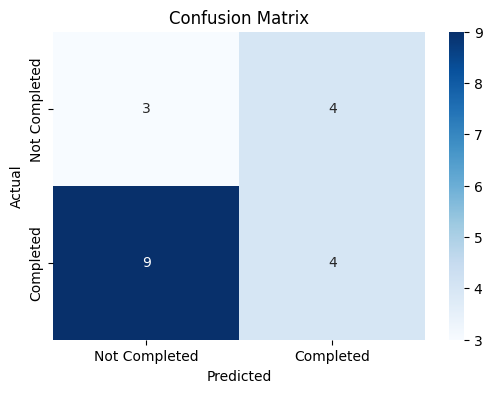

Accuracy: 0.35
Precision: 0.50
Recall: 0.31


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# === 1. Load the dataset ===

df = pd.read_csv('online_learning.csv')

# === 2. Encode the target column ===
# Assumes 'completed' column contains 'yes'/'no'
le = LabelEncoder()
df['completed'] = le.fit_transform(df['completed'])  # 'yes' -> 1, 'no' -> 0

# === 3. Define features and target ===

X = df.drop('completed', axis=1)
y = df['completed']

# === 4. Split into train and test sets ===
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 5. Train a Random Forest Classifier ===
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# === 6. Make predictions and evaluate ===
y_pred = clf.predict(X_test)

# === 7. Evaluation metrics ===
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

# === 8. Plot the confusion matrix ===
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Completed', 'Completed'],
            yticklabels=['Not Completed', 'Completed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# === 9. Print metrics ===
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
